# Libraries

In [19]:
#libraries for basic operations
import pandas as pd
import numpy as np

#libraries for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt

#for data analysis
import dabl


#for interactive widgets
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual


In [9]:
#import the dataset
data=pd.read_csv('iris.csv')

In [10]:
data.shape

(150, 6)

In [12]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [13]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


Target looks like classification
Linear Discriminant Analysis training set score: 0.980


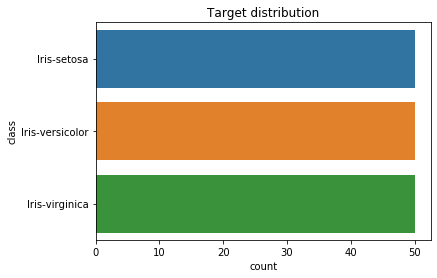

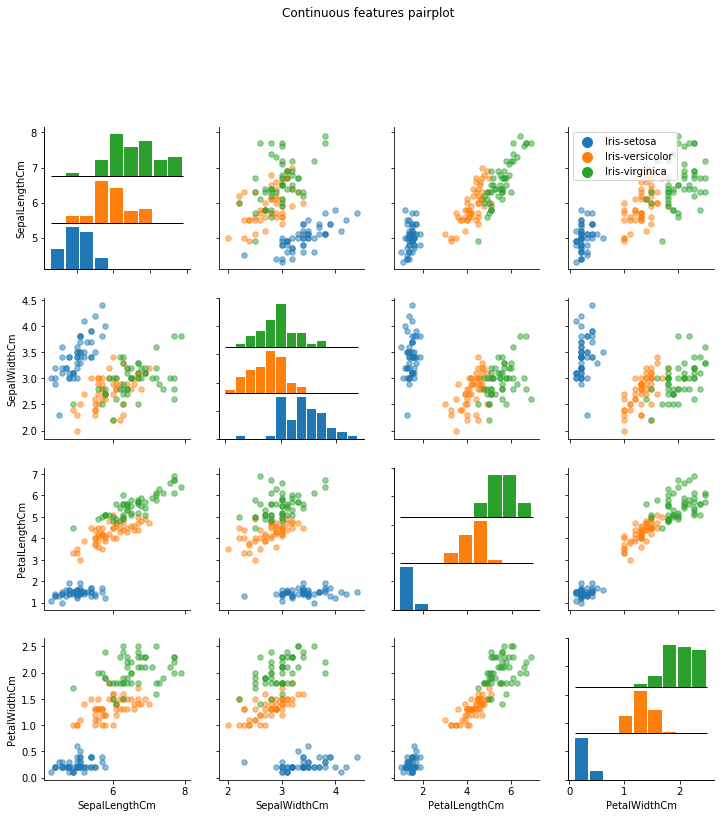

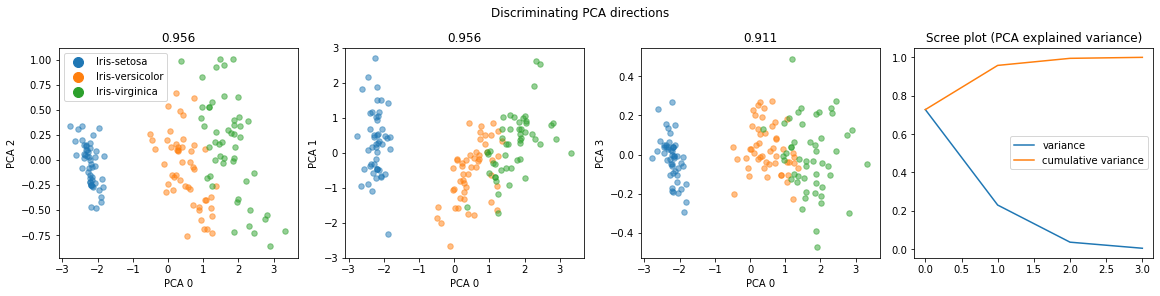

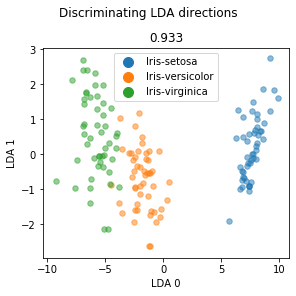

In [21]:
dabl.plot(data, target_col='Species')

# Descriptive Statistics

In [26]:
x=data.describe()
x.iloc[1:,1:].style.background_gradient(cmap='PiYG')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


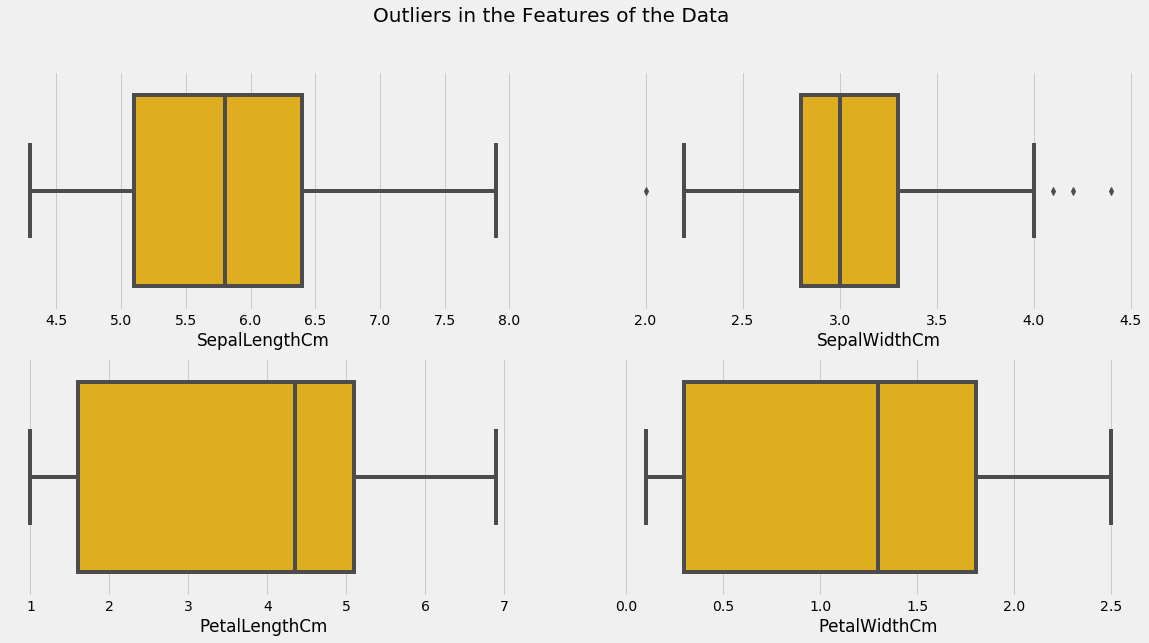

In [65]:
#Outliers
plt.rcParams['figure.figsize']=(18, 9)
plt.style.use('fivethirtyeight')

plt.subplot(2,2,1)
sns.boxplot(data['SepalLengthCm'], palette='Wistia')

plt.subplot(2,2,2)
sns.boxplot(data['SepalWidthCm'], palette='Wistia')

plt.subplot(2,2,3)
sns.boxplot(data['PetalLengthCm'], palette='Wistia')

plt.subplot(2,2,4)
sns.boxplot(data['PetalWidthCm'], palette='Wistia')

plt.suptitle('Outliers in the Features of the Data', fontsize=20)
plt.show()

In [36]:
#Check the percentage of the missing values

percentage_of_missing_data=data.isnull().sum()/data.shape[0]
print(percentage_of_missing_data)

Id               0.0
SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64


In [37]:
data['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

# Inferential Statistics

In [41]:
#Lets find the probability of getting setosa
x=data[data['Species']=='Iris-setosa'].shape[0]
probability_of_getting_setosa=x/data.shape[0]
print('The probability of getting setos is {0:.2f}%'.format(probability_of_getting_setosa*100))

The probability of getting setos is 33.33%


In [45]:
#checking the range of features

petal_length=data['PetalLengthCm'].max()-data['PetalLengthCm'].min()
print(petal_length)

petal_width=data['PetalWidthCm'].max()-data['PetalWidthCm'].min()
print(petal_width)

sepal_length=data['SepalLengthCm'].max()-data['SepalLengthCm'].min()
print(sepal_length)

sepal_width=data['SepalWidthCm'].max()-data['SepalWidthCm'].min()
print(sepal_width)


5.9
2.4
3.6000000000000005
2.4000000000000004


# Data Visualization

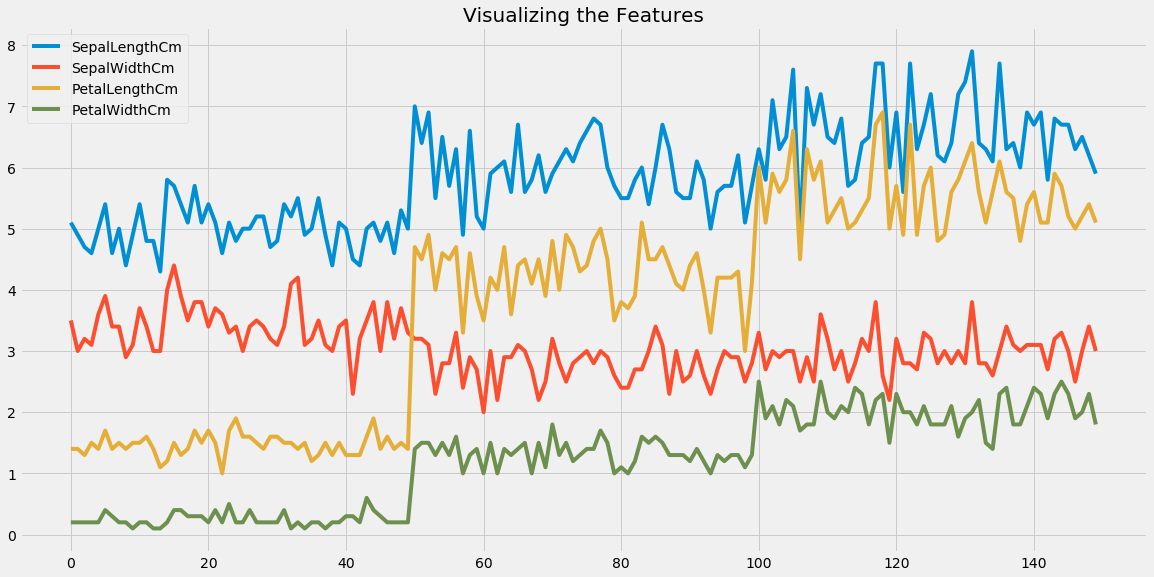

In [46]:
plt.rcParams['figure.figsize']=(18, 9)
data.iloc[:,1:].plot()
plt.title('Visualizing the Features', fontsize=20)
plt.show()

# Data Preparation

In [47]:
#Separation of target column
target=data['Species']
features=data.drop(['Id','Species'], axis=1)

#checking the shape
print('Target:',target.shape)
print("Features:", features.shape)

Target: (150,)
Features: (150, 4)


In [48]:
#Lets split the features and target into train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(features, target, test_size=0.2, random_state=0)

print("x_train:", x_train.shape)
print("x_test:", x_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

x_train: (120, 4)
x_test: (30, 4)
y_train: (120,)
y_test: (30,)


# Modelling



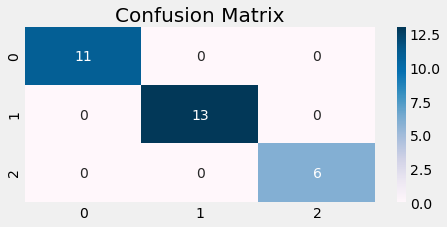

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

model=LogisticRegression()
model.fit(x_train, y_train)

y_pred=model.predict(x_test)

cm=confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize']=(7, 3)
sns.heatmap(cm, annot=True, cmap='PuBu')
plt.title('Confusion Matrix', fontsize=20)
plt.show()

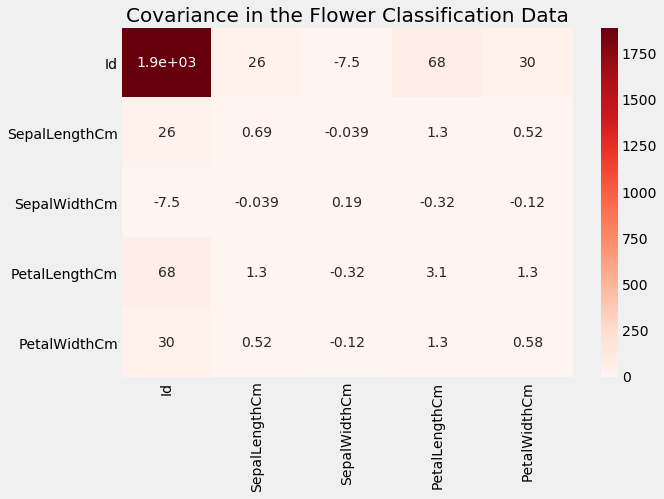

In [83]:
plt.rcParams['figure.figsize']=(9, 6)
sns.heatmap(data.cov(),
           cmap='Reds',
           annot=True)
plt.title('Covariance in the Flower Classification Data', fontsize=20)
plt.show()

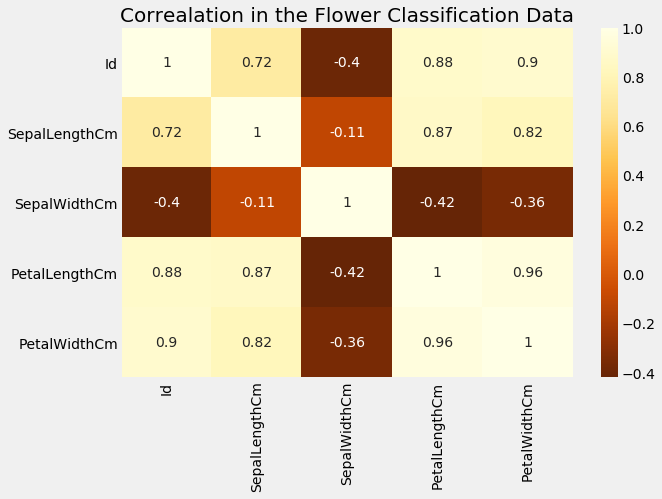

In [80]:
plt.rcParams['figure.figsize']=(9,6)
sns.heatmap(data.corr(),
           cmap='YlOrBr_r',
           annot=True)
plt.title('Correalation in the Flower Classification Data', fontsize=20)
plt.show()
          